In [1]:
# Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Ignore UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [2]:
# Loading the Dataset
df=pd.read_csv(r'DMO.csv',index_col=0)
df.head()

,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,Date1,...,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
Sno,,,,,,,,,,,,,,,,,,,,,
1,1,Assam,S1438213588544409600,0,1,1,0,3,S1438213588544409600,15-09-2021,...,0.0,0.0,0.0,3.23,0.0,0.00,0.0,1,-2,1
2,2,Assam,S1438437895270846464,0,1,1,0,3,S1438437895270846464,16-09-2021,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,-1,0
3,3,Assam,S1439558164936941574,0,1,1,0,3,S1439558164936941574,19-09-2021,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,-2,1
4,4,Assam,S1439920409801945089,0,1,3,0,5,S1439920409801945089,20-09-2021,...,0.0,0.0,0.0,0.00,0.0,2.08,0.0,1,-1,0
5,5,Assam,S1440221445011898371,0,1,1,0,3,S1440221445011898371,21-09-2021,...,0.0,0.0,0.0,5.71,0.0,0.00,0.0,1,-1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23006 entries, 1 to 23006
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                23006 non-null  int64  
 1   State            23006 non-null  object 
 2   conversation_id  23006 non-null  object 
 3   retweet_count    23006 non-null  int64  
 4   reply_count      23006 non-null  int64  
 5   like_count       23006 non-null  int64  
 6   quote_count      23006 non-null  int64  
 7   Buzz             23006 non-null  int64  
 8   id               23006 non-null  object 
 9   Date1            23006 non-null  object 
 10  OpnHours         23006 non-null  object 
 11  DateDay          23006 non-null  object 
 12  Day              23006 non-null  object 
 13  Time             23006 non-null  object 
 14  3-Phase          23006 non-null  object 
 15  4-phase          23006 non-null  object 
 16  Followers        23006 non-null  int64  
 17  Status text      

In [4]:
df.shape

(23006, 40)

In [5]:
df.isnull().sum()

X                  0
State              0
conversation_id    0
retweet_count      0
reply_count        0
like_count         0
quote_count        0
Buzz               0
id                 0
Date1              0
OpnHours           0
DateDay            0
Day                0
Time               0
3-Phase            0
4-phase            0
Followers          0
Status text        0
Vividness          0
ContentType        0
WC                 0
Clout              0
Cognition          0
Affect             0
emotion            0
emo_pos            0
emo_neg            0
we                 0
tentat             0
Drives             0
i                  0
we.1               0
they               0
insight            0
cause              0
discrep            0
certitude          0
Positive           0
Negative           0
Total_Sentiment    0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.columns

Index(['X', 'State', 'conversation_id', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'Buzz', 'id', 'Date1', 'OpnHours',
       'DateDay', 'Day', 'Time', '3-Phase', '4-phase', 'Followers',
       'Status text', 'Vividness', 'ContentType', 'WC', 'Clout', 'Cognition',
       'Affect', 'emotion', 'emo_pos', 'emo_neg', 'we', 'tentat', 'Drives',
       'i', 'we.1', 'they', 'insight', 'cause', 'discrep', 'certitude',
       'Positive', 'Negative', 'Total_Sentiment'],
      dtype='object')

In [8]:
df.describe().style.background_gradient(cmap='PuBu')


,X,retweet_count,reply_count,like_count,quote_count,Buzz,Followers,WC,Clout,Cognition,Affect,emotion,emo_pos,emo_neg,we,tentat,Drives,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
count,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000
mean,828.641833,18.857168,3.595062,139.501304,1.468660,203.262931,508226.524515,38.723420,63.853962,4.705857,7.366719,4.433875,1.091667,3.258420,0.632105,0.652306,3.192485,0.053130,0.632105,0.193785,1.431833,0.483109,0.519711,0.219480,1.269799,-1.056377,0.326176
std,776.896316,61.300045,32.241142,537.268359,17.794031,730.136030,596031.456792,12.588226,25.410441,4.318090,4.128888,2.664032,2.008155,1.660668,1.651663,1.600454,3.710467,0.518322,1.651663,0.806686,2.318887,1.273838,1.349585,0.828681,0.656546,0.283570,0.770302
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5164.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.000000
25%,260.000000,4.000000,0.000000,27.000000,0.000000,42.000000,91325.000000,31.000000,40.060000,1.850000,4.440000,2.440000,0.000000,2.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
50%,592.000000,9.000000,1.000000,63.000000,1.000000,96.000000,190197.000000,40.000000,65.160000,4.000000,6.670000,4.000000,0.000000,2.700000,0.000000,0.000000,2.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
75%,1135.000000,21.000000,3.000000,137.000000,1.000000,208.000000,650771.000000,46.000000,88.150000,6.980000,9.520000,5.560000,2.130000,4.000000,0.000000,0.000000,4.880000,0.000000,0.000000,0.000000,2.380000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
max,3685.000000,3519.000000,4580.000000,38244.000000,2546.000000,48864.000000,1972674.000000,205.000000,99.000000,50.000000,37.500000,30.000000,23.530000,20.000000,30.000000,50.000000,40.000000,15.380000,30.000000,12.730000,33.330000,33.330000,33.330000,14.290000,5.000000,-1.000000,6.000000


In [9]:
df['Total_Sentiment'].value_counts()

Total_Sentiment
0    18648
1     2133
2     1496
3      571
4      128
5       26
6        4
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

In [10]:
# Feature Engineering
# Create an engagement rate feature
df['engagement_rate'] = (df['retweet_count'] + df['reply_count'] + df['like_count'] + df['quote_count']) / df['Followers']
df.head()

,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,Date1,...,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment,engagement_rate
Sno,,,,,,,,,,,,,,,,,,,,,
1,1,Assam,S1438213588544409600,0,1,1,0,3,S1438213588544409600,15-09-2021,...,0.0,0.0,3.23,0.0,0.00,0.0,1,-2,1,0.000387
2,2,Assam,S1438437895270846464,0,1,1,0,3,S1438437895270846464,16-09-2021,...,0.0,0.0,0.00,0.0,0.00,0.0,1,-1,0,0.000387
3,3,Assam,S1439558164936941574,0,1,1,0,3,S1439558164936941574,19-09-2021,...,0.0,0.0,0.00,0.0,0.00,0.0,1,-2,1,0.000387
4,4,Assam,S1439920409801945089,0,1,3,0,5,S1439920409801945089,20-09-2021,...,0.0,0.0,0.00,0.0,2.08,0.0,1,-1,0,0.000775
5,5,Assam,S1440221445011898371,0,1,1,0,3,S1440221445011898371,21-09-2021,...,0.0,0.0,5.71,0.0,0.00,0.0,1,-1,0,0.000387


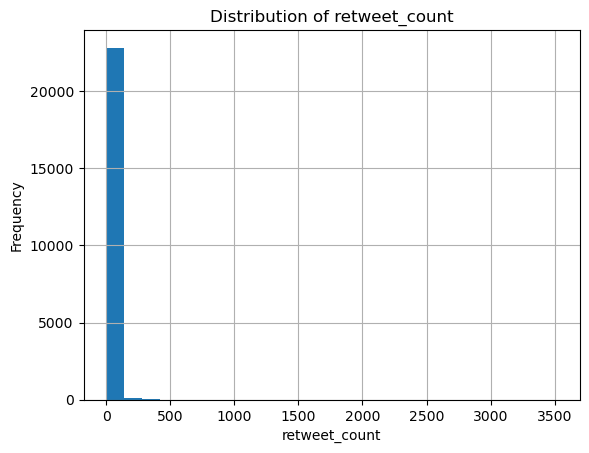

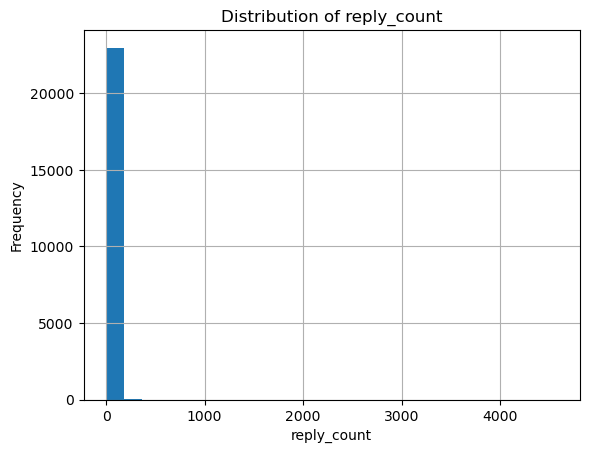

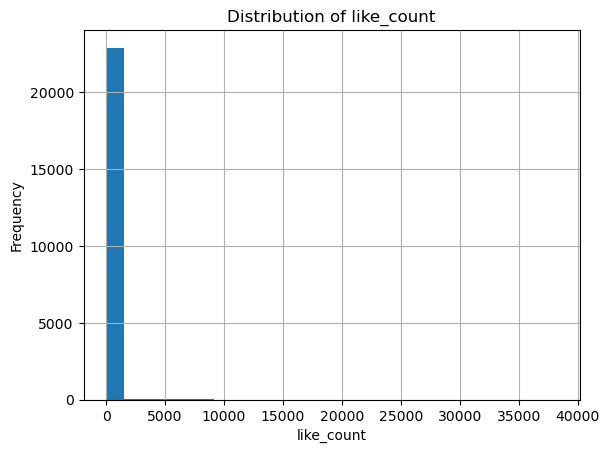

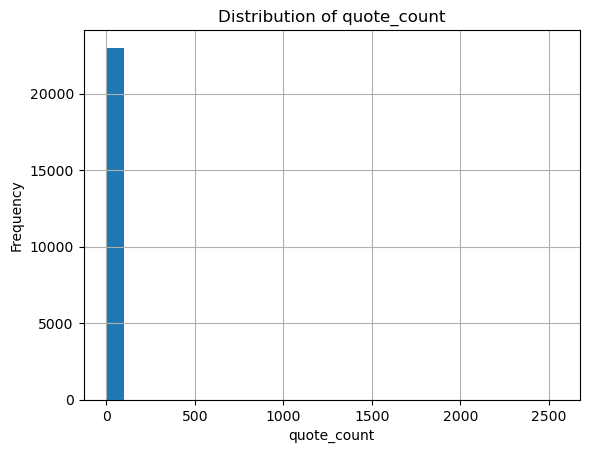

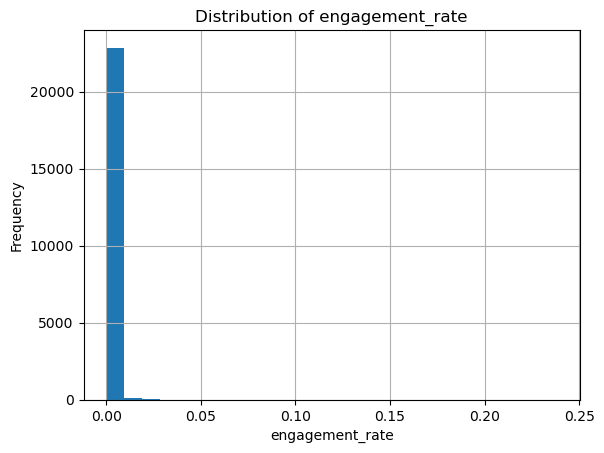

In [11]:
#Visualizing the Distribution of numerical features
# Histograms of numerical features
numerical_features = ['retweet_count', 'reply_count', 'like_count', 'quote_count', 'engagement_rate']
for feature in numerical_features:
    df[feature].hist(bins=25)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()



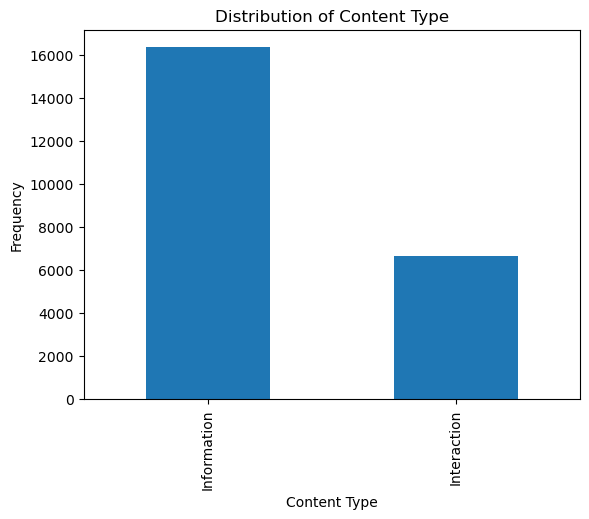

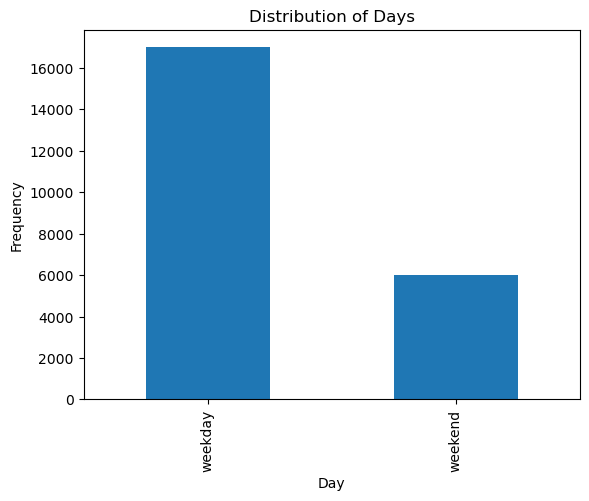

In [12]:
#Distribution of Categorical Features
# Bar plot of ContentType
df['ContentType'].value_counts().plot(kind='bar')
plt.title('Distribution of Content Type')
plt.xlabel('Content Type')
plt.ylabel('Frequency')
plt.show()

# Bar plot of Day
df['Day'].value_counts().plot(kind='bar')
plt.title('Distribution of Days')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()


* There are more informational content than interactional.
* More engagement on Weekdays than on Weekends.

C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


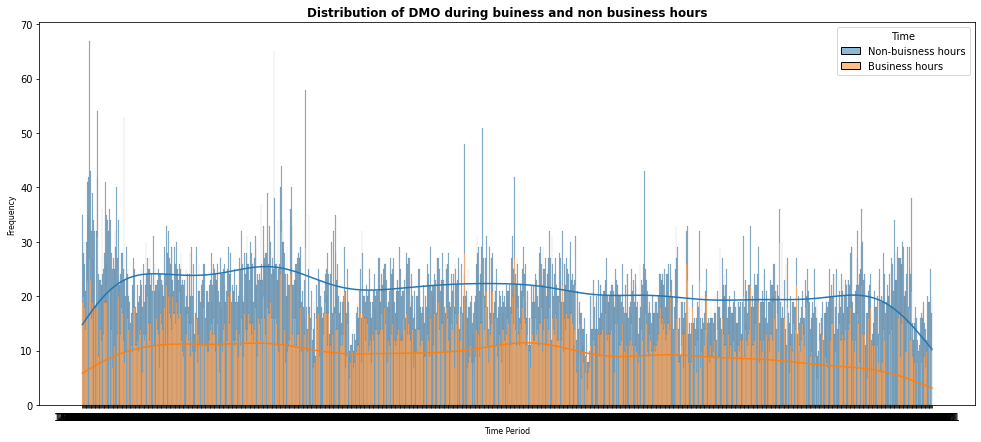

In [13]:
fig, ax = plt.subplots(1,1,figsize=(17,7),dpi=71)
sns.histplot(data=df,x="Date1",hue="Time",multiple='stack',element='bars',kde=True)
plt.title("Distribution of DMO during buiness and non business hours",fontsize=12,color='black',fontweight='bold')
plt.xlabel("Time Period",fontsize=8,color='black')
plt.ylabel("Frequency",fontsize=8,color='black')
plt.show()

* Higher engagement is seen within the period 2021-09 to 2022-01

C:\Users\princ\AppData\Local\Temp\ipykernel_5356\546290022.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date1'] = pd.to_datetime(df['Date1'])


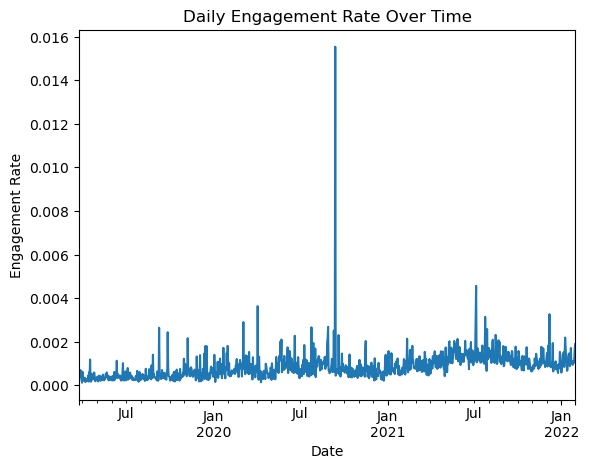

In [14]:
# Time Series Analysis
# Convert Date1 to datetime
df['Date1'] = pd.to_datetime(df['Date1'])

# Convert 'Date1' column to datetime format
df['Date1'] = pd.to_datetime(df['Date1'], format='%d-%m-%Y')

# Set Date1 as the index
df.set_index('Date1', inplace=True)

# Plot engagement rate over time
df['engagement_rate'].resample('D').mean().plot()
plt.title('Daily Engagement Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Engagement Rate')
plt.show()

* There is a gradual increase in engagement rate between July 2020 to Jan 2021

In [15]:
# Create a temporary DataFrame with a copy of the relevant columns
temp_df = df[['Total_Sentiment']].copy()

# Extract the year from the index and create a new column
temp_df['Year'] = temp_df.index.year

# Calculate the mean Total_Sentiment by year
mean_by_year = temp_df.groupby('Year')['Total_Sentiment'].mean()

# Display the result
print(mean_by_year)




Year
2019    0.463993
2020    0.350637
2021    0.231149
2022    0.204054
Name: Total_Sentiment, dtype: float64


Year
2019    0.0
2020    0.0
2021    0.0
2022    0.0
Name: seasonal, dtype: float64


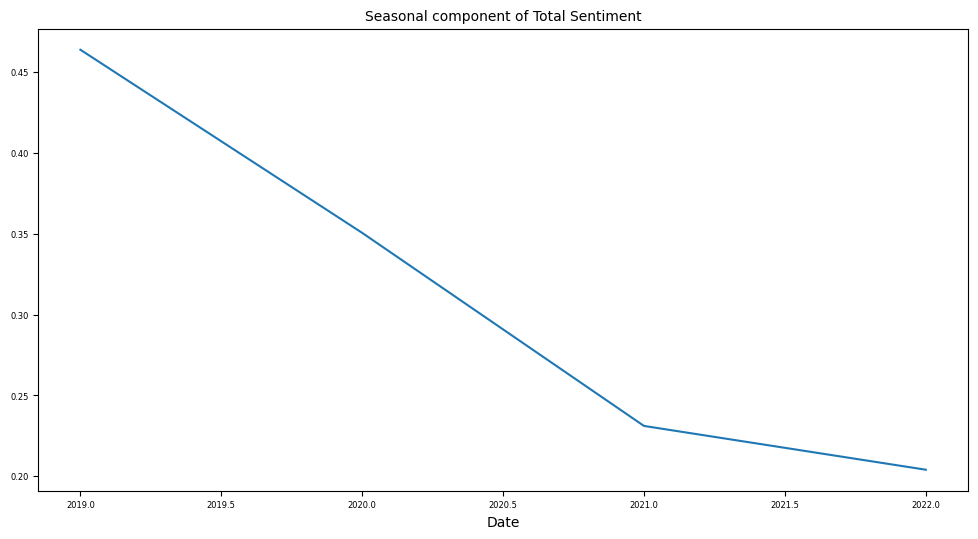

In [16]:
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(mean_by_year,model = 'additive',period=1)

# Print the seasonality component
print(decomposition.seasonal)

# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component of Total Sentiment', fontsize=10)
plt.show()

* We see that the trend of Sentiment is decreasing, with a gradual decrease from 2021.

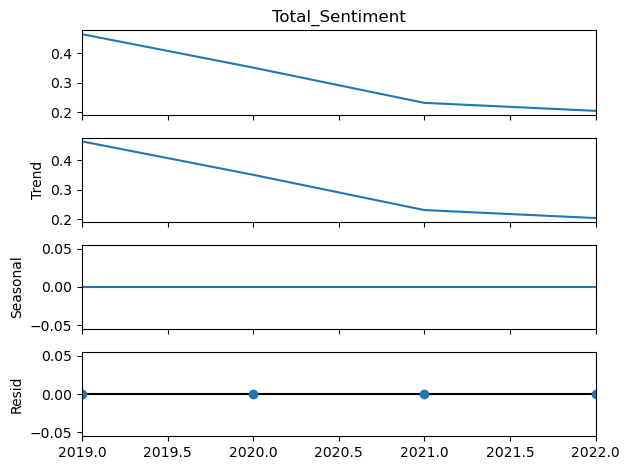

In [17]:
decomposition.plot()
plt.show()

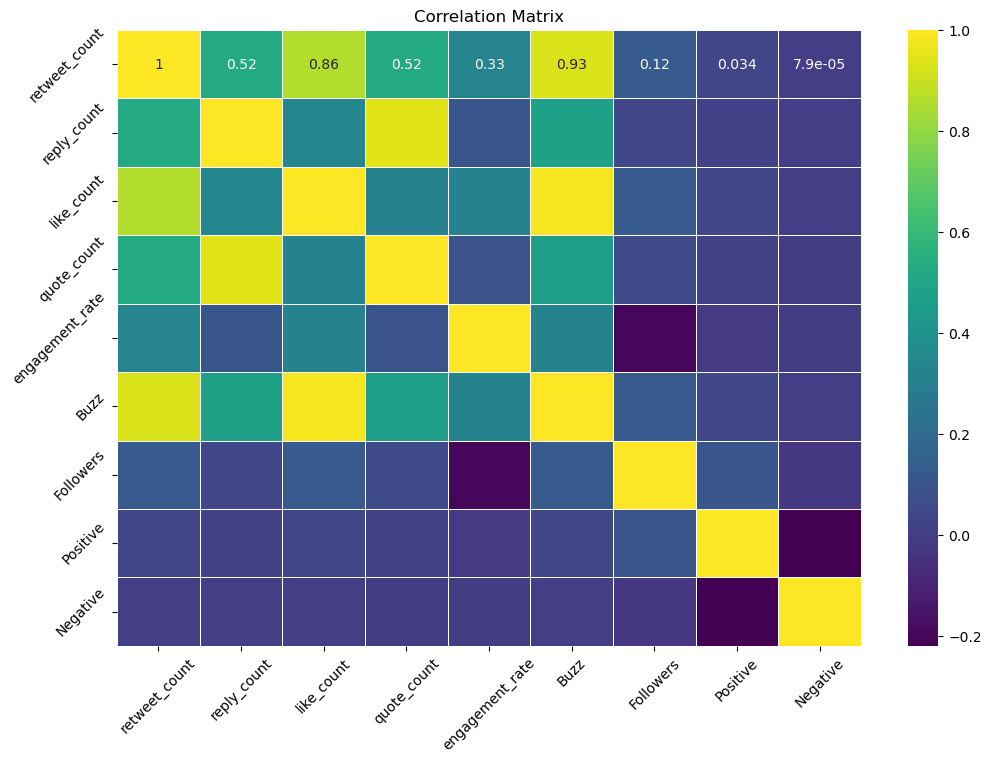

In [18]:
# Correlation Analysis
# Correlation matrix calculation
numerical_features = ['retweet_count', 'reply_count', 'like_count', 'quote_count', 'engagement_rate', 'Buzz', 'Followers', 'Positive', 'Negative']
corr_matrix = df[numerical_features].corr()

# Plotting the heatmap with values displayed in each cell
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2g', linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()



* We see a high correlation between retweet_count and Buzz, followed by retweet_count and like_count.

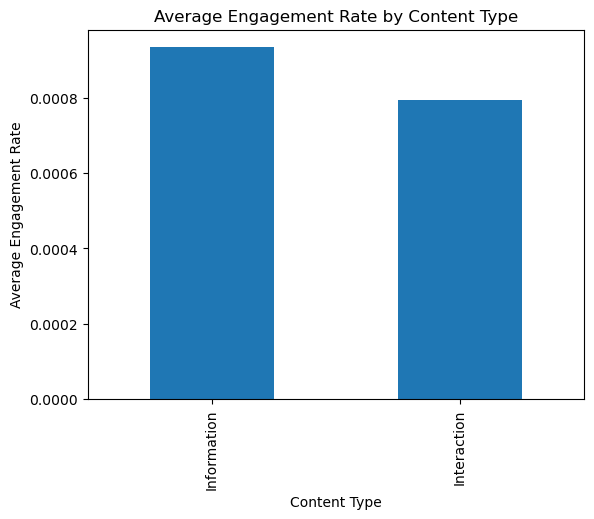

In [19]:
#  Content Analysis
# Group by ContentType and calculate mean engagement rate
content_engagement = df.groupby('ContentType')['engagement_rate'].mean()

# Plot the results
content_engagement.plot(kind='bar')
plt.title('Average Engagement Rate by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Engagement Rate')
plt.show()


* Average Engagement Rate for Informational content is higher than of Interactional content.

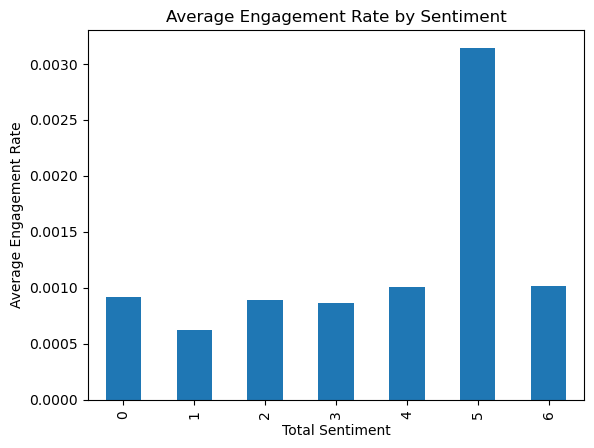

In [20]:
# Sentiment Analysis
# Group by Total_Sentiment and calculate mean engagement rate
sentiment_engagement = df.groupby('Total_Sentiment')['engagement_rate'].mean()

# Plot the results
sentiment_engagement.plot(kind='bar')
plt.title('Average Engagement Rate by Sentiment')
plt.xlabel('Total Sentiment')
plt.ylabel('Average Engagement Rate')
plt.show()


* We see, Average Total Sentiment is 'Positive'

In [21]:
def sentiment(x): 
    i = x
    if i < 2:
        return "Negetive"
    elif i > 2 & i < 4:
        return "Neutral"
    else:
        return "Positive"
        
        
df['Sentiment'] = df['Total_Sentiment'].apply(lambda x : sentiment(x) )

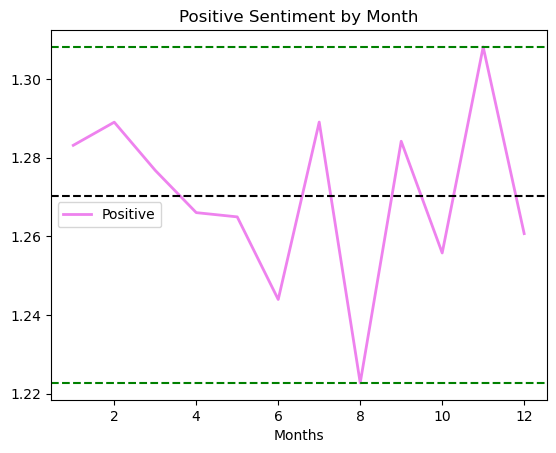

In [22]:

temp_df = df[["Positive"]]
# Get month for each dates in the index 
index_month = temp_df.index.month

# Compute the mean for each month of the year
mean_by_month = temp_df.groupby(index_month).mean()

# Plot the mean for each month of the year
x_axis = mean_by_month.plot(color='violet',linewidth=2)

# Add a  horizontal line
x_axis.axhline(mean_by_month.max().max(), color='green', linestyle='--')
x_axis.axhline(mean_by_month.mean().max(), color='black', linestyle='--')
x_axis.axhline(mean_by_month.min().min(), color='green', linestyle='--')

# Specify the fontsize on the legend
plt.legend(fontsize=10)
plt.title("Positive Sentiment by Month",color='black')
plt.xlabel("Months",color='black')
# Show plot
plt.show()

* Positive Sentiments are higher at the starting of the year and than at the last of the year.

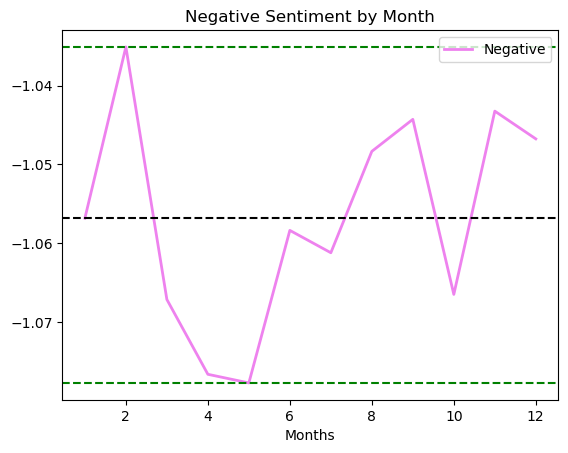

In [23]:
temp_df = df[["Negative"]]
# Get month for each dates in the index 
index_month = temp_df.index.month

# Compute the mean for each month of the year
mean_by_month = temp_df.groupby(index_month).mean()

# Plot the mean for each month of the year
x_axis = mean_by_month.plot(color='violet',linewidth=2)

# Add a  horizontal line
x_axis.axhline(mean_by_month.max().max(), color='green', linestyle='--')
x_axis.axhline(mean_by_month.mean().max(), color='black', linestyle='--')
x_axis.axhline(mean_by_month.min().min(), color='green', linestyle='--')

# Specify the fontsize on the legend
plt.legend(fontsize=10)
plt.title("Negative Sentiment by Month",color='black')
plt.xlabel("Months",color='black')
# Show plot
plt.show()

* Negative Sentiments are higher at the start of the year

C:\Users\princ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


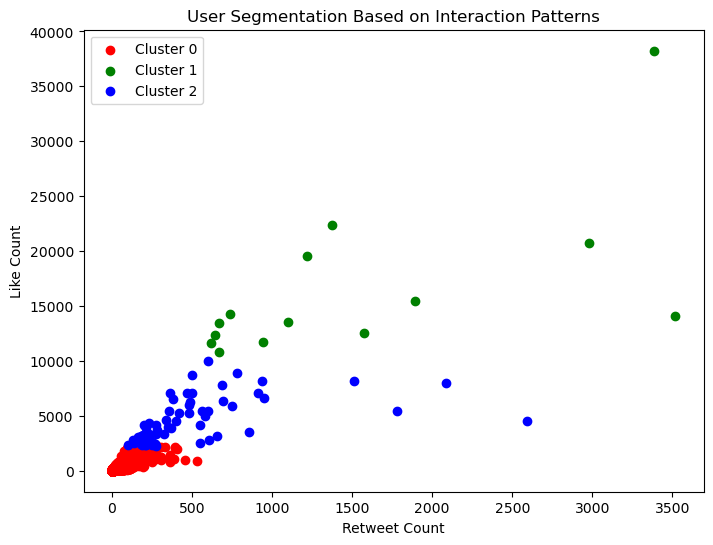

In [24]:
# User Segmentation
# Select features for clustering
user_data = df[['retweet_count', 'reply_count', 'like_count', 'quote_count']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(user_data)

# Define colors for each cluster
cluster_colors = {0: 'red', 1: 'green', 2: 'blue'}

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster_label, color in cluster_colors.items():
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['retweet_count'], cluster_data['like_count'], c=color, label=f'Cluster {cluster_label}')
plt.title('User Segmentation Based on Interaction Patterns')
plt.xlabel('Retweet Count')
plt.ylabel('Like Count')
plt.legend()
plt.show()



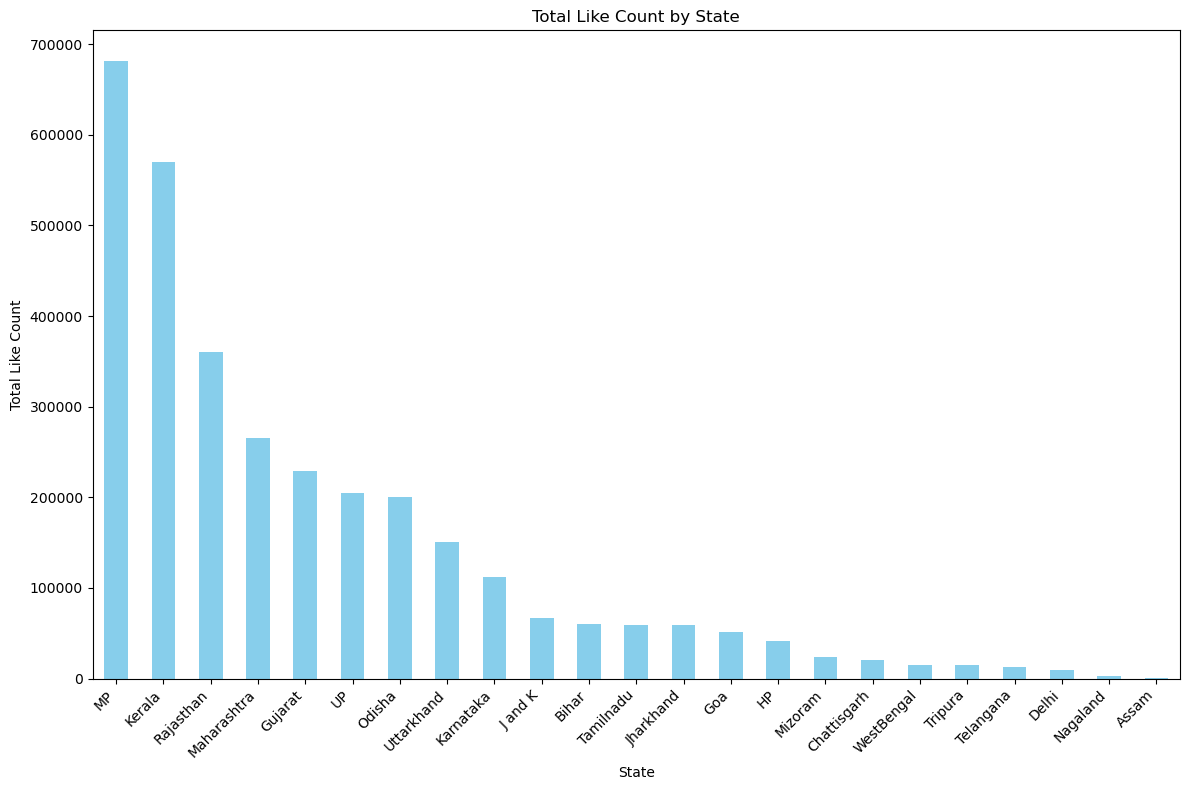

In [25]:
# Grouping the data by State and calculating total Like Count for each state
like_count_by_state = df.groupby('State')['like_count'].sum().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
like_count_by_state.plot(kind='bar', color='skyblue')
plt.title('Total Like Count by State')
plt.xlabel('State')
plt.ylabel('Total Like Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


* MP has the highest like_count, followed by Kerela and Rajasthan.

<Figure size 1200x800 with 0 Axes>

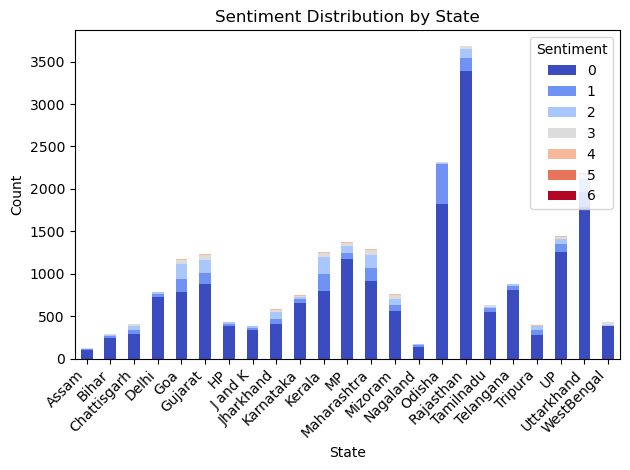

In [26]:
# Grouping the data by State and Total_Sentiment, and calculating the count for each sentiment category
sentiment_by_state = df.groupby(['State', 'Total_Sentiment']).size().unstack(fill_value=0)

# Plotting the stacked bar plot
plt.figure(figsize=(12, 8))
sentiment_by_state.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sentiment Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()


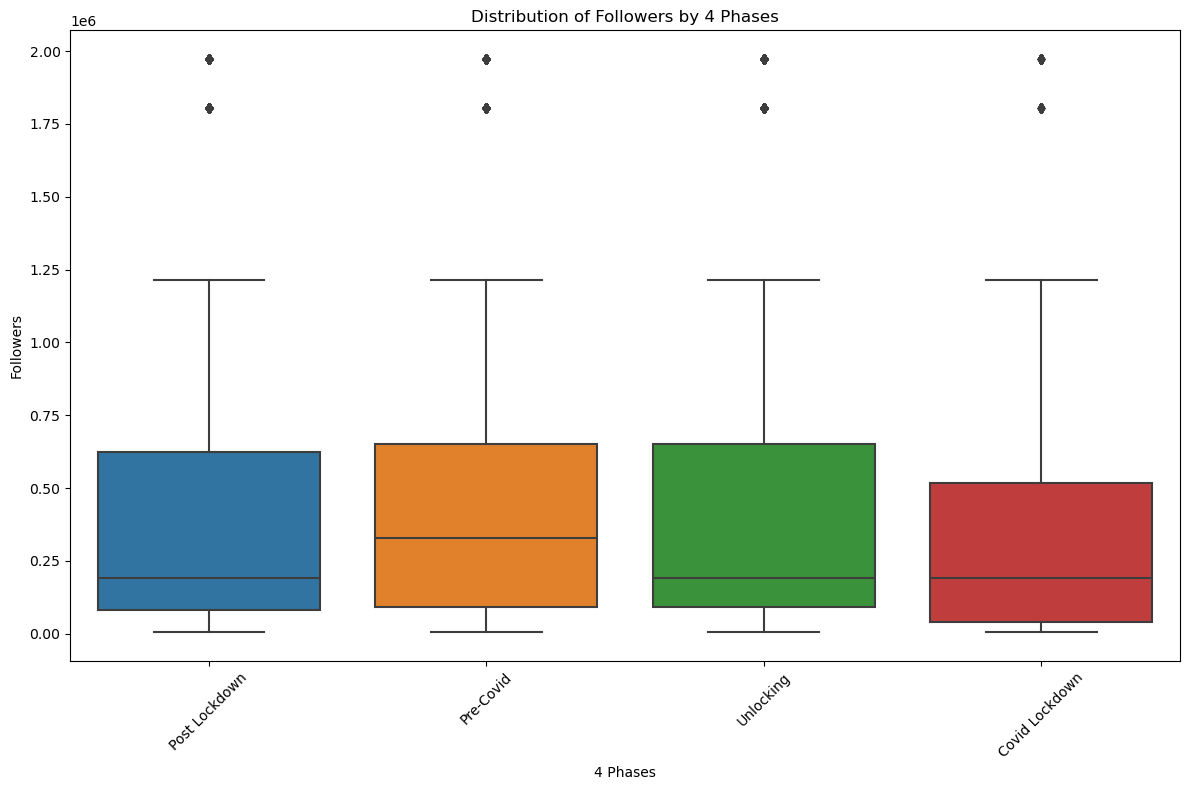

In [27]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the box plot or violin plot
sns.boxplot(x='4-phase', y='Followers', data=df)
# sns.violinplot(x='4-phase', y='Followers', data=df)  # Alternatively, you can use a violin plot

# Add titles and labels
plt.title('Distribution of Followers by 4 Phases')
plt.xlabel('4 Phases')
plt.ylabel('Followers')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* No of followers increases in the Pre-Covid phase and in Covid Lockdown phase.

## Model Building and Prediction

In [28]:
# Defining Features 
features = ['retweet_count', 'reply_count', 'like_count', 'quote_count', 'engagement_rate', 'Buzz', 'Followers', 'Positive', 'Negative']

target = 'Total_Sentiment'  


In [29]:
X = df[features]
y = df[target]

# Splitting data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=1000) 
model.fit(X_train_scaled, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
